<a href="https://colab.research.google.com/github/LauraWangQiu/GPUs/blob/main/src/lab4/Jupyter-notebooks/ejercicio_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrenamiento del dataset mnist
* Clasificación de un problema de escritura con **MNIST dataset** [^1]
* Cargamos el dataset importando con *mnist.load_data()*

![MNIST example](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png) Source: Wikipedia.


[^1]: https://en.wikipedia.org/wiki/MNIST_database

# Ejercicio
* Creación de nueva red neuronal y su evaluación para el dataset MNIST

![CNN example](https://drive.google.com/uc?id=1dpyEYquPdWkl8cFbvECYP87bYgpamGq9)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8092 - loss: 0.6149 - val_accuracy: 0.9819 - val_loss: 0.0601
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9703 - loss: 0.1044 - val_accuracy: 0.9866 - val_loss: 0.0402
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9783 - loss: 0.0740 - val_accuracy: 0.9895 - val_loss: 0.0320
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9833 - loss: 0.0542 - val_accuracy: 0.9897 - val_loss: 0.0319
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9851 - loss: 0.0486 - val_accuracy: 0.9900 - val_loss: 0.0281
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9865 - loss: 0.0421 - val_accuracy: 0.9921 - val_loss: 0.0252
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9882 - loss: 0.0378 - val_accuracy: 0.9907 - val_loss: 0.0263
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9901 - loss: 0.0303 - val_accuracy: 

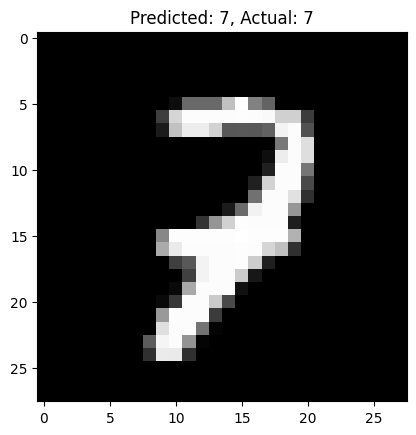

In [4]:
# Importamos las bibliotecas necesarias
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Cargamos el dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizamos las imágenes al rango [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Redimensionamos las imágenes para que tengan un canal (grayscale)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Convertimos las etiquetas a formato one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Definimos el modelo CNN
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

# Evaluamos el modelo
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Visualizamos una predicción
import numpy as np
import random

id_random = random.randint(0, x_test.shape[0])
test_im = x_test[id_random]
pred = model.predict(test_im.reshape(1, 28, 28, 1), batch_size=1, verbose=0)

plt.imshow(test_im.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {np.argmax(pred)}, Actual: {np.argmax(y_test[id_random])}")
plt.show()